In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## MOOC Econometrics

### Training Exercise 1.5

Notes:

- This exercise uses the datafile `TrainExer15` and requires a computer.
- The dataset `TrainExer15` is available on the website.

In [3]:
winning_times = pd.read_csv('TrainExer15-wining-times.txt', sep='\t')
winning_times

,Game,Year,Winmen,Winwomen
0,1,1948,10.30,11.90
1,2,1952,10.40,11.50
2,3,1956,10.50,11.50
3,4,1960,10.20,11.00
4,5,1964,10.00,11.40
5,6,1968,9.95,11.08
6,7,1972,10.14,11.07
7,8,1976,10.06,11.08
8,9,1980,10.25,11.06
9,10,1984,9.99,10.97


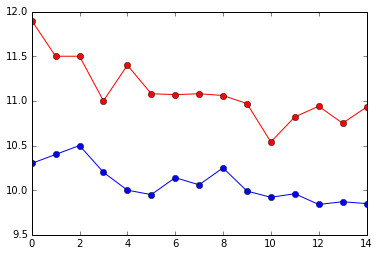

In [16]:
winning_times.Winmen.plot(marker='o', color='blue')
winning_times.Winwomen.plot(marker='o', color='red')

### Questions

In Lecture 1.5, we applied simple regression for data on winning times on the Olympic 100 meter (athletics). We
computed the regression coefficients $a$ and $b$ for two trend models, one with a linear trend and one with a nonlinear
trend. In a test question, you created forecasts of the winning times for both men and women in 2008 and 2012.
Of course, you can also forecast further ahead in the future. In fact, it is even possible to predict when men and
women would run equally fast, if the current trends persist.

1. Show that the linear trend model predicts equal winning times at around 2140.
2. Show that the nonlinear trend model predicts equal winning times at around 2192.
3. Show that the linear trend model predicts equal winning times of approximately 8.53 seconds.
4. Comment on these outcomes and on the underlying regression models.

In [4]:
from pandas.stats.api import ols

In [28]:
men = ols(y=winning_times.Winmen, x=winning_times.Year)
men


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         15
Number of Degrees of Freedom:   2

R-squared:         0.6734
Adj R-squared:     0.6482

Rmse:              0.1228

F-stat (1, 13):    26.8007, p-value:     0.0002

Degrees of Freedom: model 1, resid 13

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -0.0095     0.0018      -5.18     0.0002    -0.0131    -0.0059
     intercept    28.8540     3.6262       7.96     0.0000    21.7466    35.9614
---------------------------------End of Summary---------------------------------

In [29]:
women = ols(y=winning_times.Winwomen, x=winning_times.Year)
women


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         15
Number of Degrees of Freedom:   2

R-squared:         0.6724
Adj R-squared:     0.6472

Rmse:              0.2039

F-stat (1, 13):    26.6789, p-value:     0.0002

Degrees of Freedom: model 1, resid 13

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -0.0157     0.0030      -5.17     0.0002    -0.0217    -0.0098
     intercept    42.1894     6.0188       7.01     0.0000    30.3926    53.9862
---------------------------------End of Summary---------------------------------

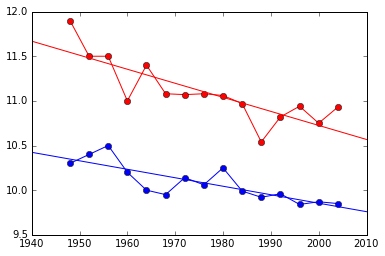

In [34]:
years_predict = pd.Series([1940, 2010])

plt.plot(winning_times.Year, winning_times.Winmen, marker='o', color='blue')
plt.plot(years_predict, men.predict(x=years_predict), color='blue')

plt.plot(winning_times.Year, winning_times.Winwomen, marker='o', color='red')
plt.plot(years_predict, women.predict(x=years_predict), color='red')

- Show that the linear trend model predicts equal winning times at around 2140.
- Show that the linear trend model predicts equal winning times of approximately 8.53 seconds.


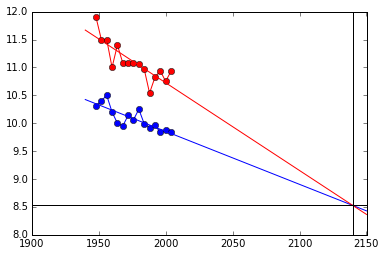

In [61]:
years_predict = pd.Series([1940, 2150])

plt.plot(winning_times.Year, winning_times.Winmen, marker='o', color='blue')
plt.plot(years_predict, men.predict(x=years_predict), color='blue')

plt.plot(winning_times.Year, winning_times.Winwomen, marker='o', color='red')
plt.plot(years_predict, women.predict(x=years_predict), color='red')

plt.axvline(x=2140, ymin=0, ymax=12, color='black')
plt.axhline(y=8.53, xmin=0, xmax=2200, color='black')

Show that the nonlinear trend model predicts equal winning times at around 2192.


In [51]:
men_log = ols(y=np.log(winning_times.Winmen), x=winning_times.Year)
women_log = ols(y=np.log(winning_times.Winwomen), x=winning_times.Year)


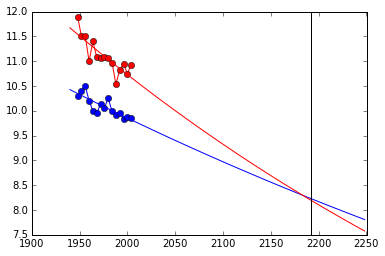

In [59]:
years_predict = pd.Series(range(1940, 2250, 4))

plt.plot(winning_times.Year, winning_times.Winmen, marker='o', color='blue')
plt.plot(years_predict, np.exp(men_log.predict(x=years_predict)), color='blue')

plt.plot(winning_times.Year, winning_times.Winwomen, marker='o', color='red')
plt.plot(years_predict, np.exp(women_log.predict(x=years_predict)), color='red')
plt.axvline(x=2192, ymin=0, ymax=12, color='black')

## Test Exercise 1

### Notes:

- See website for how to submit your answers and how feedback is organized.
- This exercise uses the datafile TestExer1 and requires a computer.
- The dataset TestExer1 is available on the website.


### Goals and skills being used:

- Get hands-on experience with performing simple regressions.
- Get feeling for consequences of violations of regression assumptions.
- Obtain some experience with how to diagnose that an assumption is violated.

### Questions

This exercise considers an example of data that do not satisfy all the standard assumptions of simple regression.
In the considered case, one particular observation lies far off from the others, that is, it is an outlier. This violates
assumptions A3 and A4, which state that all error terms $\varepsilon_i$ are drawn from one and the same distribution with
mean zero and fixed variance $\sigma^2$. The dataset contains twenty weekly observations on sales and advertising of a
department store. The question of interest lies in estimating the effect of advertising on sales. One of the weeks
was special, as the store was also open in the evenings during this week, but this aspect will first be ignored in the
analysis.

In [68]:
data = pd.read_csv('TestExer1-sales-round1.txt', sep='\t')
data.columns = ['obs', 'adv', 'sales']
data.head()

,obs,adv,sales
0,1,12,24
1,2,12,27
2,3,9,25
3,4,11,27
4,5,6,23


Make the scatter diagram with sales on the vertical axis and advertising on the horizontal axis. What do you
expect to find if you would fit a regression line to these data?

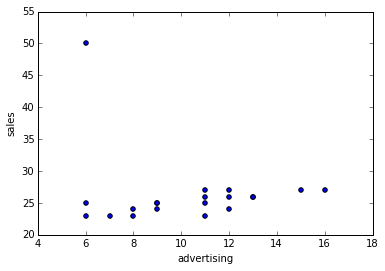

In [74]:
plt.scatter(x=data.adv, y=data.sales)
plt.ylabel('sales')
plt.xlabel('advertising')
plt.show()

Estimate the coefficients $a$ and $b$ in the simple regression model with sales as dependent variable and advertising
as explanatory factor. Also compute the standard error and $t$-value of $b$. Is $b$ significantly different from 0?

In [75]:
model = ols(y=data.sales, x=data.adv)
model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         20
Number of Degrees of Freedom:   2

R-squared:         0.0270
Adj R-squared:    -0.0270

Rmse:              5.8365

F-stat (1, 18):     0.5002, p-value:     0.4885

Degrees of Freedom: model 1, resid 18

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -0.3246     0.4589      -0.71     0.4885    -1.2240     0.5749
     intercept    29.6269     4.8815       6.07     0.0000    20.0591    39.1947
---------------------------------End of Summary---------------------------------

$b$ is not significantly different from 0

In [83]:
model.predict(x=x_new)

0    28.328594
1    24.433694
dtype: float64

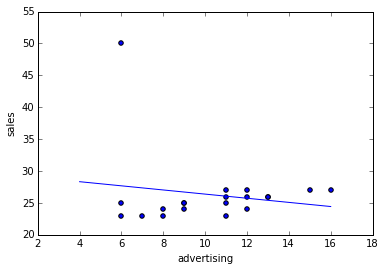

In [86]:
plt.scatter(x=data.adv, y=data.sales)
x_new = pd.Series([4, 16])
plt.plot(x_new, model.predict(x=x_new))

plt.ylabel('sales')
plt.xlabel('advertising')
plt.show()

Compute the residuals and draw a histogram of these residuals. What conclusion do you draw from this
histogram?

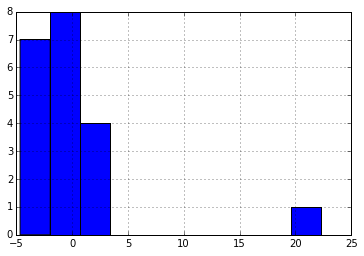

In [77]:
model.resid.hist()

Doesn't look very normal

Apparently, the regression result of part (b) is not satisfactory. Once you realize that the large residual
corresponds to the week with opening hours during the evening, how would you proceed to get a more
satisfactory regression model?

> Remove the outlier

Delete this special week from the sample and use the remaining 19 weeks to estimate the coefficients $a$ and
$b$ in the simple regression model with sales as dependent variable and advertising as explanatory factor. Also
compute the standard error and $t$-value of $b$. Is $b$ significantly different from 0?

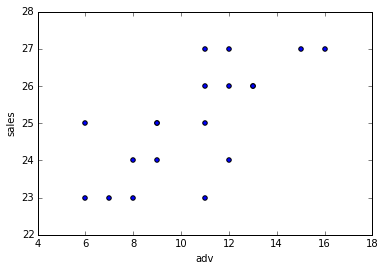

In [93]:
data_cleaned = data[data.sales < 45]
data_cleaned.plot(kind='scatter', x='adv', y='sales')

In [94]:
model = ols(y=data_cleaned.sales, x=data_cleaned.adv)
model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         19
Number of Degrees of Freedom:   2

R-squared:         0.5154
Adj R-squared:     0.4869

Rmse:              1.0537

F-stat (1, 17):    18.0784, p-value:     0.0005

Degrees of Freedom: model 1, resid 17

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.3750     0.0882       4.25     0.0005     0.2021     0.5479
     intercept    21.1250     0.9548      22.12     0.0000    19.2535    22.9965
---------------------------------End of Summary---------------------------------

Now $b \ne 0$ with $p = 0.0005$